In [22]:
import gymnasium as gym
env = gym.make("CartPole-v1",render_mode='human')
obs = env.reset()
obs

(array([-0.00525033,  0.04769389,  0.03178788, -0.03553285], dtype=float32),
 {})

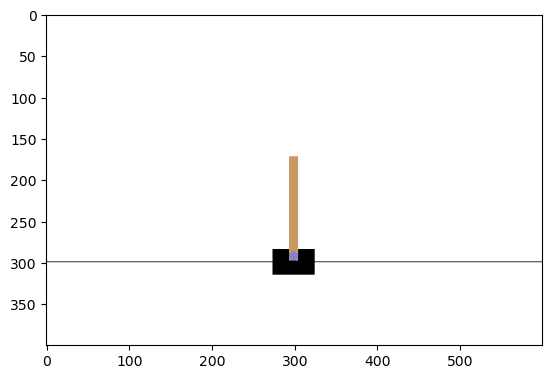

In [32]:
# Gymnasium Testing...
import gymnasium as gym
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
env = gym.make("CartPole-v1",render_mode='rgb_array')
env.reset()
plt.imshow(env.render())

## To show over many steps...
# for i in range(25):
#    plt.imshow(env.render())
#    display.display(plt.gcf())    
#    display.clear_output(wait=True)
#    env.step(env.action_space.sample()) # take a random action

# env.close()

In [ ]:
# Import the libaries
from environment import LettuceGreenhouse


In [ ]:
# Set the object for the greenhouse...
gh =  LettuceGreenhouse()


In [4]:
import scipy.io
data = scipy.io.loadmat("weatherData\outdoorWeatherWurGlas2014.mat")

In [45]:
import numpy as np
from utils import co2dens2ppm, vaporDens2rh, load_disturbances, DefineParameters
import numpy as np
from scipy.io import loadmat
import statistics
from scipy import signal

weather_data_dir="weatherData\outdoorWeatherWurGlas2014.mat"
ny=4                 # number of greenhouse measurement variables
nx=4                 # number of state variables
nd=4                 # number of disturbance (weather variables)
nu=3                 # number of control inputs
h=15*60              # sampling period (15 minutes, 900 seconds...)
c=86400              # conversion to seconds
nDays=2              # simulation days
Np=20                # number of future predictions (20 == 5hrs)
startDay=40          # start day of simulation
L = nDays*c
d = load_disturbances(c, L, h , nd, Np, startDay, weather_data_dir)
time_step = 0
d.shape # 213 rows based on the fact that from 0 to 192 and then 20 extra to 213 so we basically just have a length of 213 rows in total with the 20 extra..


(213, 4)

In [16]:
t = data['d'][:,0]
t = t - t[0]  # Days???
t[-1]

323.9930555555038